In [1]:
import os 
import numpy as np
import splitfolders
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

%matplotlib inline

In [3]:
os.chdir("C:/Users/tonyy/OneDrive/Desktop/ML project 2/corn dataset")

In [4]:
data_path = 'data'
splitted_data = 'splitted-data'

In [5]:
#Setting up the parameter

#For the parameter in the flow from directory
#I rescale it to 128x128 and use 32 batch size you can try other size 
batch_size = 32
img_width = 128
img_height = 128

#The augmetnation parameter
rotation_range = 0.4
width_shift_range = 0.2
height_shift_range = 0.3
shear_range = 0.2
zoom_range = 0.2

In [8]:
#Making the Image Data Generator

#The path for the data
path_train = "splitted_data/train"
path_test = "splitted_data/test"
path_val = "splitted_data/val"

In [9]:
#We use ImageDataGenerator to help us augment the image
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = rotation_range,
                                   width_shift_range = width_shift_range,
                                   height_shift_range = height_shift_range,
                                   shear_range = shear_range,
                                   zoom_range = zoom_range,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest'
                                    )

train_generator = train_datagen.flow_from_directory(directory = path_train,
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    target_size = (img_width, img_height)
                                                    )

test_datagen = ImageDataGenerator(rescale = 1./255.)

test_generator = test_datagen.flow_from_directory(directory = path_test,
                                                  batch_size = batch_size,
                                                  class_mode = "categorical",
                                                  target_size = (img_width, img_height)
                                                  )

valid_datagen = ImageDataGenerator(rescale = 1./255.)

valid_generator = test_datagen.flow_from_directory(directory = path_val,
                                                  batch_size = batch_size,
                                                  class_mode = "categorical",
                                                  target_size = (img_width, img_height)
                                                  )

Found 3077 images belonging to 4 classes.
Found 388 images belonging to 4 classes.
Found 383 images belonging to 4 classes.


In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.7))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

In [12]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
#Number of epochs for training
epochs = 10

In [14]:
history = model.fit(train_generator,
          epochs = epochs,
          validation_data = valid_generator,
          verbose = 1
         )

Epoch 1/10
97/97 [==============================] - 42s 437ms/step - loss: 0.5553 - accuracy: 0.7468 - val_loss: 0.2916 - val_accuracy: 0.8303
Epoch 2/10
97/97 [==============================] - 42s 428ms/step - loss: 0.3568 - accuracy: 0.8414 - val_loss: 0.2657 - val_accuracy: 0.8616
Epoch 3/10
97/97 [==============================] - 41s 427ms/step - loss: 0.2977 - accuracy: 0.8573 - val_loss: 0.2201 - val_accuracy: 0.9086
Epoch 4/10
97/97 [==============================] - 42s 434ms/step - loss: 0.2743 - accuracy: 0.8723 - val_loss: 0.2477 - val_accuracy: 0.8825
Epoch 5/10
97/97 [==============================] - 48s 494ms/step - loss: 0.2872 - accuracy: 0.8710 - val_loss: 0.3340 - val_accuracy: 0.8512
Epoch 6/10
97/97 [==============================] - 45s 461ms/step - loss: 0.2610 - accuracy: 0.8863 - val_loss: 0.2525 - val_accuracy: 0.8564
Epoch 7/10
97/97 [==============================] - 48s 496ms/step - loss: 0.2450 - accuracy: 0.8876 - val_loss: 0.1951 - val_accuracy: 0.9034

In [15]:
model.evaluate(test_generator)

13/13 [==============================] - 2s 132ms/step - loss: 0.2283 - accuracy: 0.8995


[0.22831220924854279, 0.8994845151901245]

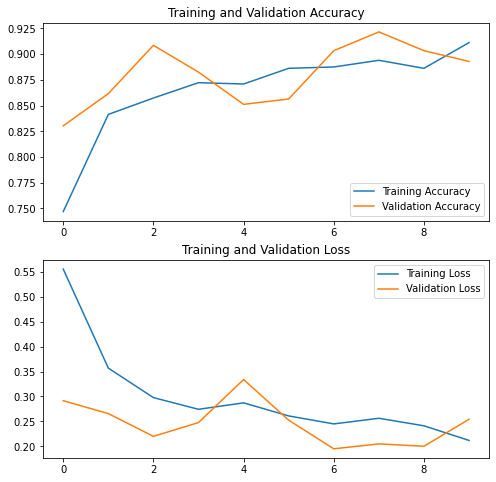

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()